<a href="https://colab.research.google.com/github/amien1410/colab-notebooks/blob/main/Colab_Pyspark_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#@title Download the dataset from Kaggle

from google.colab import drive
drive.mount('/content/drive')

!pip install kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'
!kaggle competitions download -c nfl-big-data-bowl-2020
!unzip -q "/content/nfl-big-data-bowl-2020.zip"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  0% 0.00/63.4M [00:00<?, ?B/s]
100% 63.4M/63.4M [00:00<00:00, 1.03GB/s]


In [4]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('/content/train.csv')
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW


In [10]:
df.describe()

,GameId,PlayId,X,Y,S,A,Dis,Orientation,Dir,NflId,...,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,Yards,PlayerWeight,Week,Temperature,Humidity
count,6.821540e+05,6.821540e+05,682154.000000,682154.000000,682154.000000,682154.000000,682154.000000,682131.000000,682126.000000,6.821540e+05,...,682154.000000,682154.000000,682154.000000,6.821540e+05,682132.000000,682154.000000,682154.000000,682154.000000,618508.000000,675994.000000
mean,2.017975e+09,2.017975e+13,60.036863,26.791456,2.634598,1.701739,0.278193,179.996742,180.040620,2.369743e+06,...,8.319154,11.047989,9.762570,2.446079e+06,6.910340,4.227626,253.414628,8.401587,62.010066,54.741563
std,7.844593e+05,7.844593e+09,25.499310,7.192919,1.404773,0.991380,0.145218,102.794554,106.189491,6.053648e+05,...,3.818716,10.095556,9.532945,4.833287e+05,0.985065,6.449866,48.469869,4.808791,17.071117,25.146693
min,2.017091e+09,2.017091e+13,0.660000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000e+02,...,1.000000,0.000000,0.000000,2.340000e+02,2.000000,-15.000000,153.000000,1.000000,9.000000,0.000000
25%,2.017113e+09,2.017113e+13,39.080000,22.760000,1.520000,0.950000,0.160000,90.060000,90.150000,2.532989e+06,...,6.000000,3.000000,0.000000,2.540269e+06,6.000000,1.000000,210.000000,4.000000,50.000000,43.000000
50%,2.018101e+09,2.018101e+13,60.230000,26.800000,2.510000,1.550000,0.270000,179.640000,180.180000,2.550541e+06,...,10.000000,10.000000,7.000000,2.555224e+06,7.000000,3.000000,245.000000,8.000000,64.000000,59.000000
75%,2.019091e+09,2.019091e+13,80.990000,30.850000,3.620000,2.310000,0.390000,269.780000,270.260000,2.556445e+06,...,10.000000,17.000000,16.000000,2.558116e+06,7.000000,6.000000,305.000000,12.000000,75.000000,71.000000
max,2.019112e+09,2.019113e+13,117.650000,56.450000,9.410000,14.710000,1.390000,360.000000,360.000000,2.563364e+06,...,40.000000,57.000000,59.000000,2.563327e+06,11.000000,99.000000,380.000000,17.000000,97.000000,100.000000


In [11]:
# Import SparkSession
from pyspark.sql import SparkSession

# Import required functions and classes
from pyspark.sql.functions import *
from pyspark.sql.types import *

# Machine Learning libraries
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [12]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("NFL Yardage EDA") \
    .getOrCreate()

# Load the dataset
df = spark.read.csv("/content/train.csv", header=True, inferSchema=True)

# Show the schema to understand the structure of the data
df.printSchema()

root
 |-- GameId: integer (nullable = true)
 |-- PlayId: long (nullable = true)
 |-- Team: string (nullable = true)
 |-- X: double (nullable = true)
 |-- Y: double (nullable = true)
 |-- S: double (nullable = true)
 |-- A: double (nullable = true)
 |-- Dis: double (nullable = true)
 |-- Orientation: double (nullable = true)
 |-- Dir: double (nullable = true)
 |-- NflId: integer (nullable = true)
 |-- DisplayName: string (nullable = true)
 |-- JerseyNumber: integer (nullable = true)
 |-- Season: integer (nullable = true)
 |-- YardLine: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- GameClock: timestamp (nullable = true)
 |-- PossessionTeam: string (nullable = true)
 |-- Down: integer (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- FieldPosition: string (nullable = true)
 |-- HomeScoreBeforePlay: integer (nullable = true)
 |-- VisitorScoreBeforePlay: integer (nullable = true)
 |-- NflIdRusher: integer (nullable = true)
 |-- OffenseFormation: string

In [13]:
print(f"Number of rows: {df.count()}")
print(f"Number of columns: {len(df.columns)}")

Number of rows: 682154
Number of columns: 49


In [14]:
df.show(5)

+----------+--------------+----+-----+-----+----+----+----+-----------+------+-------+---------------+------------+------+--------+-------+-------------------+--------------+----+--------+-------------+-------------------+----------------------+-----------+----------------+----------------+-----------------+----------------+-------------+-------------------+-------------------+-----+------------+------------+---------------+-----------------+--------+------------+---------------+----+----------------+--------------+-----------+----------+--------------+-----------+--------+---------+-------------+
|    GameId|        PlayId|Team|    X|    Y|   S|   A| Dis|Orientation|   Dir|  NflId|    DisplayName|JerseyNumber|Season|YardLine|Quarter|          GameClock|PossessionTeam|Down|Distance|FieldPosition|HomeScoreBeforePlay|VisitorScoreBeforePlay|NflIdRusher|OffenseFormation|OffensePersonnel|DefendersInTheBox|DefensePersonnel|PlayDirection|        TimeHandoff|           TimeSnap|Yards|PlayerHei

In [15]:
df.describe().show()

+-------+--------------------+--------------------+------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+----------------+-----------------+-----------------+------------------+------------------+--------------+------------------+-----------------+-------------+-------------------+----------------------+------------------+----------------+--------------------+------------------+--------------------+-------------+-----------------+------------+------------------+---------------+-----------------+--------+------------+---------------+-----------------+---------------+-------------+-----------+-------------+------------------+------------------+------------------+-----------------+-----------------+
|summary|              GameId|              PlayId|  Team|                 X|                Y|                 S|                 A|               Dis|       Orientation|               Dir| 

In [16]:
from pyspark.sql.functions import col, sum

# Count missing values in each column
missing_values = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
missing_values.show()

+------+------+----+---+---+---+---+---+-----------+---+-----+-----------+------------+------+--------+-------+---------+--------------+----+--------+-------------+-------------------+----------------------+-----------+----------------+----------------+-----------------+----------------+-------------+-----------+--------+-----+------------+------------+---------------+-----------------+--------+------------+---------------+----+-------+--------+-----------+----+-----------+-----------+--------+---------+-------------+
|GameId|PlayId|Team|  X|  Y|  S|  A|Dis|Orientation|Dir|NflId|DisplayName|JerseyNumber|Season|YardLine|Quarter|GameClock|PossessionTeam|Down|Distance|FieldPosition|HomeScoreBeforePlay|VisitorScoreBeforePlay|NflIdRusher|OffenseFormation|OffensePersonnel|DefendersInTheBox|DefensePersonnel|PlayDirection|TimeHandoff|TimeSnap|Yards|PlayerHeight|PlayerWeight|PlayerBirthDate|PlayerCollegeName|Position|HomeTeamAbbr|VisitorTeamAbbr|Week|Stadium|Location|StadiumType|Turf|GameWeathe

In [17]:
df.select("Team").distinct().show()
df.select("OffenseFormation").distinct().show()

+----+
|Team|
+----+
|away|
|home|
+----+

+----------------+
|OffenseFormation|
+----------------+
|          PISTOL|
|           EMPTY|
|         WILDCAT|
|      SINGLEBACK|
|          I_FORM|
|           JUMBO|
|         SHOTGUN|
|             ACE|
|            NULL|
+----------------+



In [18]:
df.groupBy("Team").count().show()
df.groupBy("OffenseFormation").count().show()

+----+------+
|Team| count|
+----+------+
|away|341077|
|home|341077|
+----+------+

+----------------+------+
|OffenseFormation| count|
+----------------+------+
|          PISTOL| 21538|
|            NULL|    88|
|           EMPTY|   682|
|         WILDCAT|  1694|
|      SINGLEBACK|299728|
|          I_FORM|136950|
|           JUMBO| 14894|
|         SHOTGUN|206558|
|             ACE|    22|
+----------------+------+



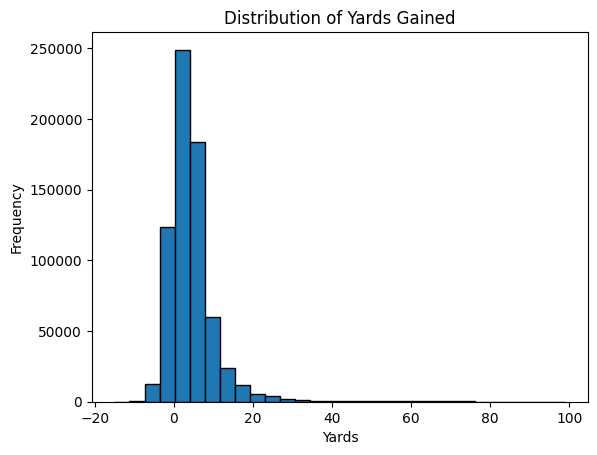

In [19]:
import matplotlib.pyplot as plt

# Collect the data for Yards column
yards_data = df.select("Yards").rdd.flatMap(lambda x: x).collect()

# Plot the distribution
plt.hist(yards_data, bins=30, edgecolor='black')
plt.title("Distribution of Yards Gained")
plt.xlabel("Yards")
plt.ylabel("Frequency")
plt.show()

In [20]:
from pyspark.sql.functions import corr

# Compute correlation between 'Yards' and other numerical features
corr_df = df.select(
    corr("Yards", "S").alias("Yards_vs_S"),
    corr("Yards", "A").alias("Yards_vs_A"),
    corr("Yards", "X").alias("Yards_vs_X"),
    corr("Yards", "Y").alias("Yards_vs_Y")
)

corr_df.show()


+-------------------+--------------------+--------------------+--------------------+
|         Yards_vs_S|          Yards_vs_A|          Yards_vs_X|          Yards_vs_Y|
+-------------------+--------------------+--------------------+--------------------+
|0.00339345379471629|0.019970066450700208|0.002226143526930...|-0.00187672549038...|
+-------------------+--------------------+--------------------+--------------------+



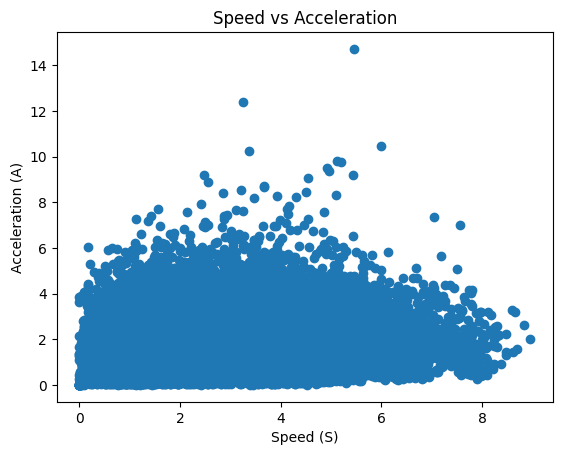

In [22]:
speed_acceleration = df.select("S", "A").sample(False, 0.1).toPandas()

plt.scatter(speed_acceleration["S"], speed_acceleration["A"])
plt.title("Speed vs Acceleration")
plt.xlabel("Speed (S)")
plt.ylabel("Acceleration (A)")
plt.show()

In [23]:
df.groupBy("OffenseFormation").pivot("Down").avg("Yards").show()

+----------------+------------------+------------------+------------------+------------------+
|OffenseFormation|                 1|                 2|                 3|                 4|
+----------------+------------------+------------------+------------------+------------------+
|          PISTOL|  4.92991452991453|4.2727272727272725|3.8732394366197185|               1.5|
|            NULL|               3.0|              NULL|              NULL|              NULL|
|           EMPTY| 4.411764705882353|             5.625|               4.4|              -5.0|
|         WILDCAT| 4.794117647058823|3.6538461538461537|             6.125|               4.0|
|      SINGLEBACK| 4.306682577565632| 4.200902934537246|3.5497896213183733|1.6732673267326732|
|          I_FORM| 4.309418210279155|  3.87772461456672|  3.30184331797235|2.8051948051948052|
|           JUMBO|1.9142857142857144| 1.413265306122449|2.5419847328244276|               0.4|
|         SHOTGUN| 4.388269918015556| 4.5234994337